In [115]:
import pandas as pd
import numpy as np
import joblib

from matplotlib import pyplot as plt
from scipy.sparse import hstack

In [66]:
df = pd.read_csv('data.csv')

# EDA

In [3]:
df

,title,city,marker_icon,workplace_type,company_name,experience_level,skills,contract_type,from,to
0,Frontend Developer,Gdynia,javascript,partly_remote,Profil Software,mid,Python Vue.js JavaScript ES6,b2b,12000.0,18000.0
1,Data Engineer,Warszawa,data,partly_remote,Technicus,mid,engineering Data SQL,permanent,10000.0,16000.0
2,Team Support Leader,Kraków,pm,partly_remote,Mc COMP S.A.,mid,Problem Solving Teamwork Communication Skills,b2b,12000.0,14000.0
3,Team Support Leader,Kraków,pm,partly_remote,Mc COMP S.A.,mid,Problem Solving Teamwork Communication Skills,permanent,11000.0,13000.0
4,STB Embedded Developer,Warszawa,c,remote,Scenifi,senior,C++ C STB,b2b,21000.0,29000.0
...,...,...,...,...,...,...,...,...,...,...
13247,Senior Android Developer,Warszawa,mobile,remote,Experis Manpower Group,senior,Linux Kotlin Android SDK,b2b,26880.0,35280.0
13248,Remote Senior Front-end Angular Engineer,Warszawa,javascript,remote,Ligo Headhunters,senior,Angular 7 English JavaScript,b2b,7500.0,8500.0
13249,Mid Flutter Developer,Poznań,mobile,partly_remote,sky gate,mid,REST API GitHub Flutter,permanent,9000.0,18000.0
13250,Cobol Developer - Remote Job,Warszawa,other,remote,sky gate,mid,RPG PL1 Cobol,b2b,4000.0,7000.0


In [67]:
df.city.value_counts()

Warszawa       2037
Wrocław        1526
Kraków         1448
Gdańsk          884
Poznań          861
               ... 
Sanok             1
Gowidlino         1
Kościerzyna       1
Raszyn            1
Cieszyn           1
Name: city, Length: 254, dtype: int64

In [11]:
df.marker_icon.value_counts()

javascript      1912
java            1458
devops          1225
data            1032
net             1029
testing          835
php              817
pm               628
python           571
mobile           568
analytics        533
c                460
admin            387
support          369
architecture     301
other            240
ux               214
security         204
erp              153
scala             84
game              77
ruby              75
go                55
html              25
Name: marker_icon, dtype: int64

In [13]:
df.workplace_type.value_counts()

remote           10528
partly_remote     2510
office             214
Name: workplace_type, dtype: int64

In [14]:
df.company_name.value_counts()

Halfing&Petersen                         250
WASKO S.A.                               210
Cleeng sp. z o.o.                        160
Appliscale                               138
CXC Global Poland SP z.o.o               114
                                        ... 
Snowflake                                  1
Akademia Górniczo-Hutnicza w Krakowie      1
mITp                                       1
ReadyCode                                  1
gamigo group                               1
Name: company_name, Length: 914, dtype: int64

In [15]:
df.experience_level.value_counts()

mid       7240
senior    5561
junior     451
Name: experience_level, dtype: int64

In [16]:
df.contract_type.value_counts()

b2b                 8153
permanent           4983
mandate_contract     116
Name: contract_type, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5fd1427100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5fd1483820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5fd14279a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5fd14839d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5fd1483550>],
 'means': []}

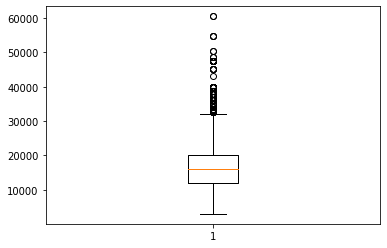

In [133]:
plt.boxplot(df['from'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5fd13bbca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5fd13d62b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5fd13bbb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5fd13d6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5fd13d6b20>],
 'means': []}

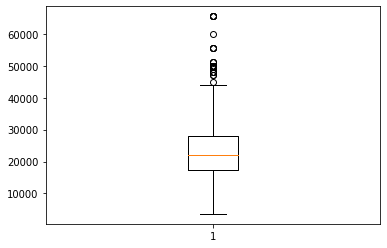

In [134]:
plt.boxplot(df['to'])

## Create test dataframe

In [10]:
X_test = pd.DataFrame(columns=df.drop(['from', 'to'], axis=1).columns)

In [11]:
X_test

,title,city,marker_icon,workplace_type,company_name,experience_level,skills,contract_type


In [100]:
X_test = X_test.append({'title': 'ldfkgldkgldkgl sfdslfsd sfdsfs ssds',
               'city': '',
               'marker_icon': '',
               'workplace_type': 'remote',
               'company_name': 'Appliscale',
               'experience_level': 'junior',
               'skills': 'asdasdas adsasd asasa',
               'contract_type': 'permanent'}, ignore_index=True)

In [101]:
X_test

,title,city,marker_icon,workplace_type,company_name,experience_level,skills,contract_type
0,data scientist,Warszawa,data,remote,Appliscale,junior,python sql,permanent
1,data scientist,Warszawa,data,remote,Appliscale,junior,python sql,permanent
2,data scientist,Warszawa,data,remote,Appliscale,junior,python sql,permanent
3,,Warszawa,data,remote,Appliscale,junior,,permanent
4,ldfkgldkgldkgl sfdslfsd sfdsfs ssds,Warszawa,data321321,remote,Appliscale,junior,asdasdas adsasd asasa,permanent
5,ldfkgldkgldkgl sfdslfsd sfdsfs ssds,,,remote,Appliscale,junior,asdasdas adsasd asasa,permanent


# Process test data

## Handle categorical features

In [69]:
categorical_structure = pd.read_csv('categorical_structure.csv')

In [70]:
categorical_structure['0'].values

array(['city_96-321 Musuły', 'city_Aleksandrów Łódzki', 'city_Andrespol',
       ..., 'contract_type_b2b', 'contract_type_mandate_contract',
       'contract_type_permanent'], dtype=object)

In [103]:
X_ohe = pd.DataFrame(columns = categorical_structure['0'].values)

In [104]:
X_ohe

,city_96-321 Musuły,city_Aleksandrów Łódzki,city_Andrespol,city_Augustów,city_Balice,city_Berlin,city_Białystok,city_Białystok,city_Bielany Wrocławskie,city_Bielsko-Biała,...,company_name_summ-it,company_name_superdevs,company_name_travactory N.V.,company_name_Świat Kwiatów,experience_level_junior,experience_level_mid,experience_level_senior,contract_type_b2b,contract_type_mandate_contract,contract_type_permanent


In [102]:
pd.get_dummies(X_test.drop(['title', 'skills'], axis=1))

,city_,city_Warszawa,marker_icon_,marker_icon_data,marker_icon_data321321,workplace_type_remote,company_name_Appliscale,experience_level_junior,contract_type_permanent
0,0,1,0,1,0,1,1,1,1
1,0,1,0,1,0,1,1,1,1
2,0,1,0,1,0,1,1,1,1
3,0,1,0,1,0,1,1,1,1
4,0,1,0,0,1,1,1,1,1
5,1,0,1,0,0,1,1,1,1


In [128]:
X_ohe = X_ohe.append(pd.get_dummies(X_test.drop(['title', 'skills'], axis=1))).fillna(0)

In [129]:
X_ohe

,city_96-321 Musuły,city_Aleksandrów Łódzki,city_Andrespol,city_Augustów,city_Balice,city_Berlin,city_Białystok,city_Białystok,city_Bielany Wrocławskie,city_Bielsko-Biała,...,company_name_Świat Kwiatów,experience_level_junior,experience_level_mid,experience_level_senior,contract_type_b2b,contract_type_mandate_contract,contract_type_permanent,city_,marker_icon_,marker_icon_data321321
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0


In [130]:
last_index = X_ohe.columns.get_loc('contract_type_permanent')

In [131]:
X_ohe.drop(X_ohe.iloc[:, last_index + 1:], inplace=True, axis=1)

In [132]:
X_ohe

,city_96-321 Musuły,city_Aleksandrów Łódzki,city_Andrespol,city_Augustów,city_Balice,city_Berlin,city_Białystok,city_Białystok,city_Bielany Wrocławskie,city_Bielsko-Biała,...,company_name_summ-it,company_name_superdevs,company_name_travactory N.V.,company_name_Świat Kwiatów,experience_level_junior,experience_level_mid,experience_level_senior,contract_type_b2b,contract_type_mandate_contract,contract_type_permanent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1


## Handle text features

In [117]:
title_vectorizer = joblib.load('title_matrix_vectorizer.pkl')

In [118]:
skills_vectorizer = joblib.load('skills_matrix_vectorizer.pkl')

In [119]:
title_vocabulary = title_vectorizer.get_feature_names_out()

In [120]:
skills_vocabulary = skills_vectorizer.get_feature_names_out()

In [121]:
X_test.title = [' '.join([word.lower() for word in title.split() if word.lower() in title_vocabulary]) for title in X_test.title]

In [122]:
X_test.skills = [' '.join([word.lower() for word in skills.split() if word.lower() in skills_vocabulary]) for skills in X_test.skills]

In [123]:
title_matrix = title_vectorizer.transform(X_test.title)

In [124]:
skills_matrix = skills_vectorizer.transform(X_test.skills)

In [125]:
text_sparse_matrix = hstack((skills_matrix, title_matrix))

In [126]:
text_sparse_matrix

<6x1568 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [127]:
pd.DataFrame(np.hstack((X_ohe, text_sparse_matrix.toarray())))

,0,1,2,3,4,5,6,7,8,9,...,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
